In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 99% 424M/428M [00:08<00:00, 67.9MB/s]
100% 428M/428M [00:08<00:00, 50.6MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/toronto-emotional-speech-set-tess.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [52]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))

        label = filename.split('_')[-1]


        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [9]:
len(paths)

2800

In [10]:
paths[:5]

['/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_rag_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_juice_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_pole_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_thin_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_dime_ps.wav']

In [11]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [12]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,ps
1,/content/TESS Toronto emotional speech set dat...,ps
2,/content/TESS Toronto emotional speech set dat...,ps
3,/content/TESS Toronto emotional speech set dat...,ps
4,/content/TESS Toronto emotional speech set dat...,ps


In [13]:
df['label'].value_counts()

ps         400
neutral    400
angry      400
fear       400
disgust    400
sad        400
happy      400
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

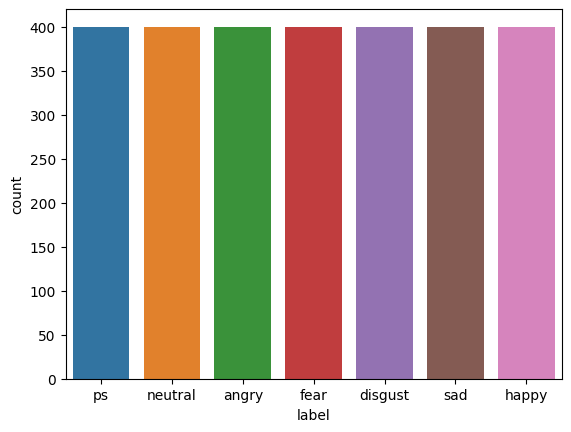

In [14]:
sns.countplot(data=df, x='label')

In [15]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

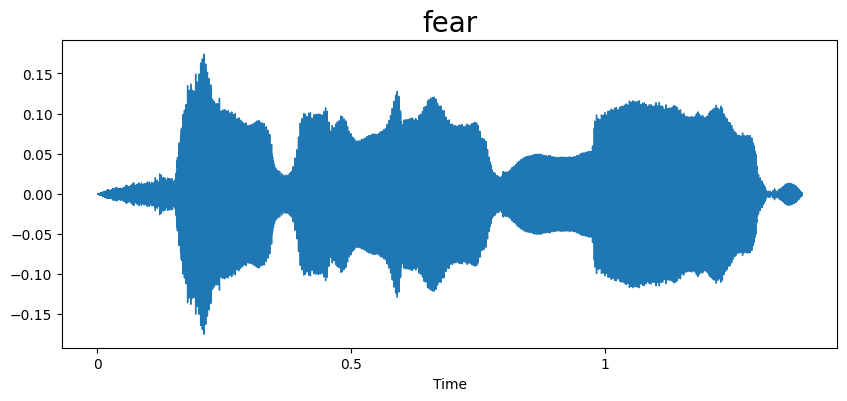

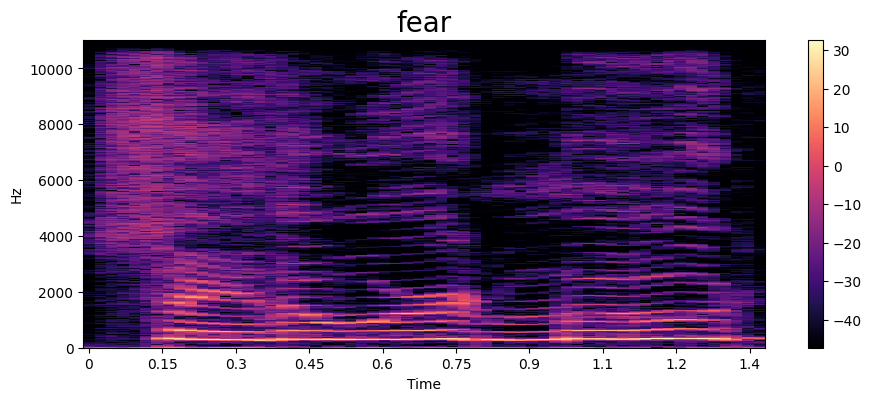

In [16]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


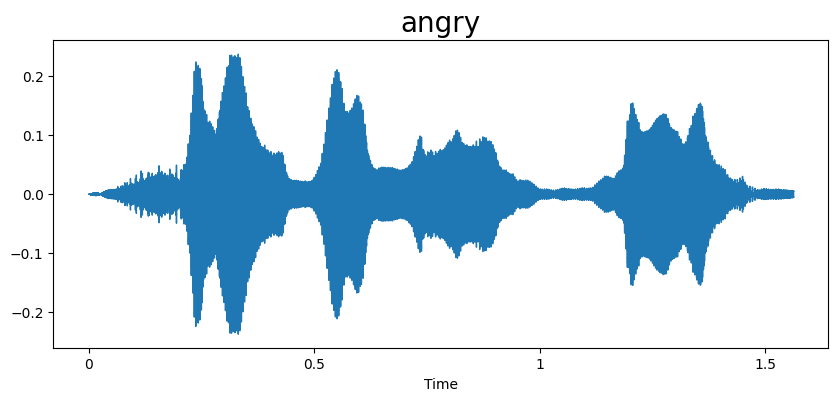

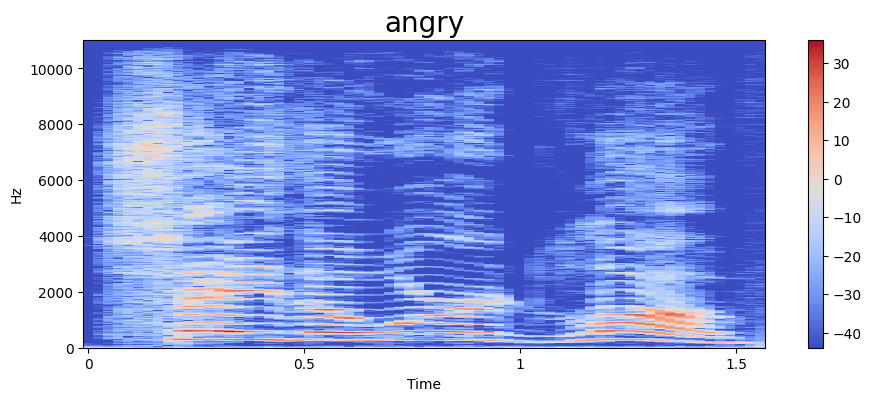

In [17]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

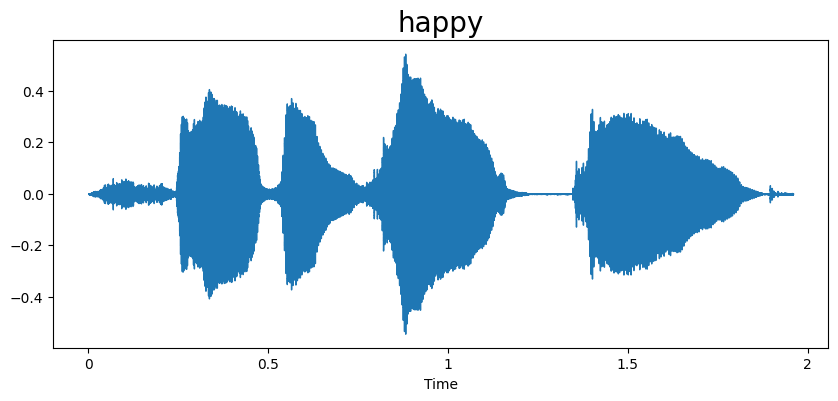

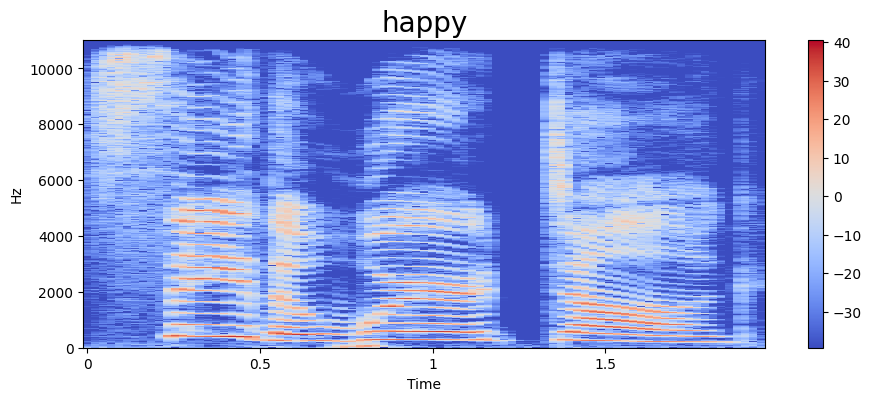

In [18]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

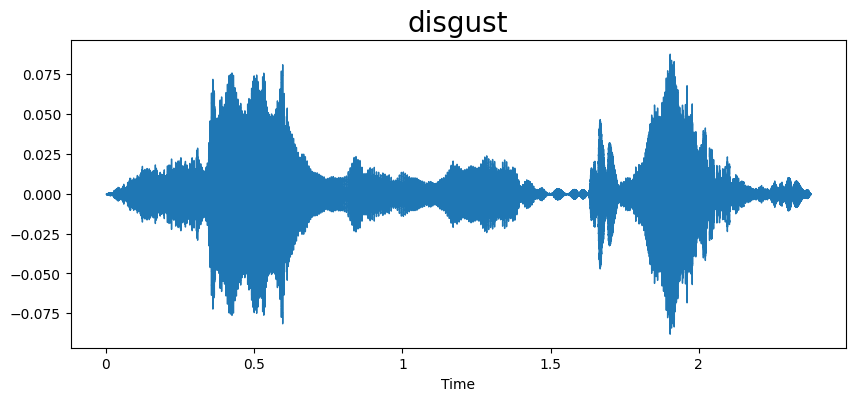

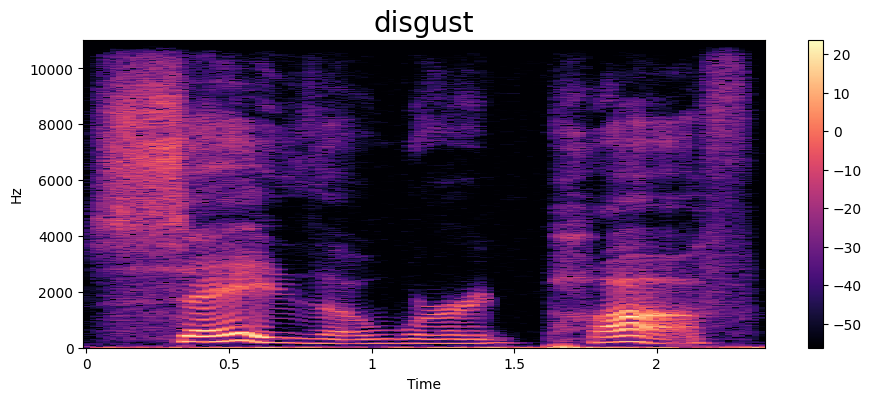

In [19]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

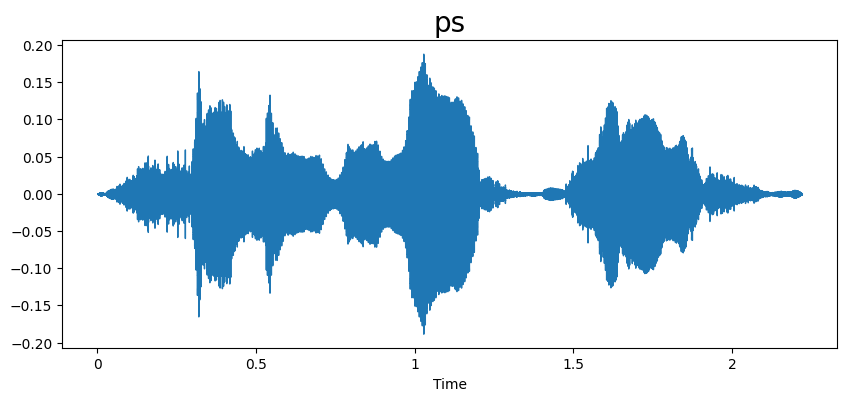

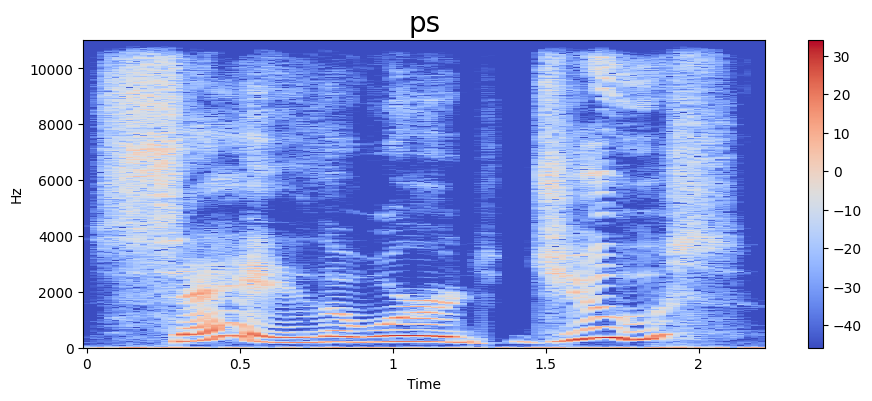

In [20]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

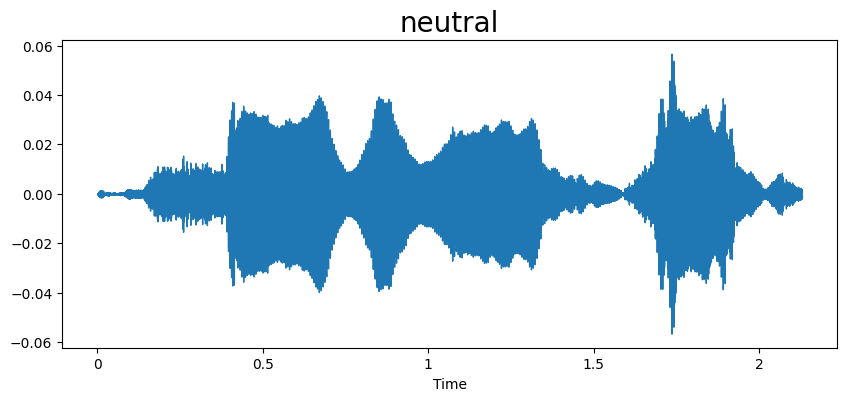

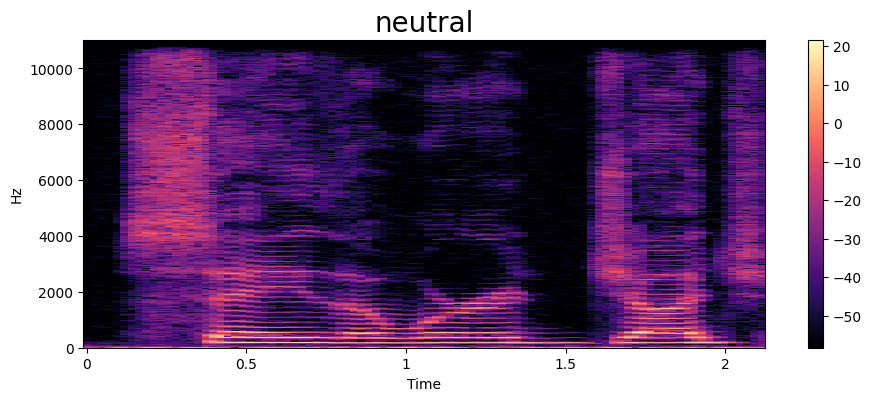

In [21]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

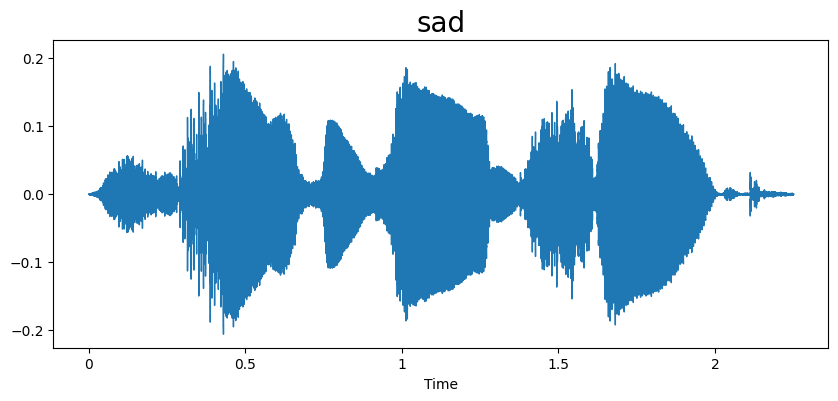

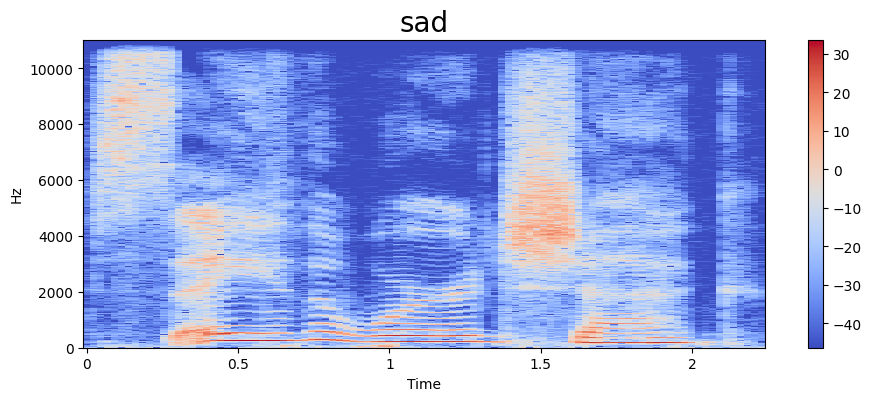

In [22]:

emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [23]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [24]:
extract_mfcc(df['speech'][0])

array([-4.2732101e+02,  1.2536529e+02,  1.8597184e-01, -3.0543127e+01,
        1.1153388e+01, -6.8094511e+00, -2.1221186e+01,  6.5640755e+00,
       -2.3651659e+01, -2.6917543e+00, -1.7290979e+01, -7.8217106e+00,
       -2.5730159e+00, -7.3447304e+00, -9.3653589e-02,  2.6366940e+00,
       -2.6356525e+00,  1.3162650e+01,  3.1376233e+00, -2.9049966e+00,
        1.1425714e+00,  5.8957163e-02, -2.3434772e+00,  3.7818997e+00,
       -4.0502706e+00,  4.8011127e+00, -6.2582202e+00,  3.3098910e+00,
       -3.2756269e+00,  4.7689843e+00,  3.8133039e+00,  8.0857258e+00,
        1.0100894e+01,  9.2375507e+00,  8.8883228e+00,  1.1595640e+01,
        1.1241537e+01,  1.5580587e+01,  1.3085206e+01,  1.4089969e+01],
      dtype=float32)

In [25]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [26]:
X_mfcc

0       [-427.321, 125.36529, 0.18597184, -30.543127, ...
1       [-415.0264, 64.46424, 11.712152, 4.9118085, 8....
2       [-414.05014, 109.069496, 33.544716, -5.595623,...
3       [-403.33743, 82.60545, 10.314016, -4.6547694, ...
4       [-500.87177, 125.58545, -2.378306, -10.352736,...
                              ...                        
2795    [-365.01642, 77.617744, -11.532592, 12.601002,...
2796    [-322.19745, 41.76592, -41.02037, -5.340494, -...
2797    [-363.87198, 61.788532, -0.71578974, -5.808084...
2798    [-317.82718, 41.663933, -7.87541, 6.5574274, -...
2799    [-350.80453, 77.4077, -9.017971, 11.781249, -1...
Name: speech, Length: 2800, dtype: object

In [27]:
X_mfcc.value_counts().sum()

2800

In [28]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [29]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [30]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [31]:
y = y.toarray()

In [32]:
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [33]:
y.shape

(2800, 7)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [35]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)


Epoch 1/50
35/35 [==============================] - 9s 182ms/step - loss: 1.0926 - accuracy: 0.5866 - val_loss: 3.0694 - val_accuracy: 0.2821
Epoch 2/50
35/35 [==============================] - 6s 171ms/step - loss: 0.3532 - accuracy: 0.8777 - val_loss: 3.2915 - val_accuracy: 0.3482
Epoch 3/50
35/35 [==============================] - 5s 144ms/step - loss: 0.1691 - accuracy: 0.9469 - val_loss: 4.0168 - val_accuracy: 0.3214
Epoch 4/50
35/35 [==============================] - 7s 188ms/step - loss: 0.1256 - accuracy: 0.9607 - val_loss: 3.7990 - val_accuracy: 0.3500
Epoch 5/50
35/35 [==============================] - 5s 150ms/step - loss: 0.1144 - accuracy: 0.9670 - val_loss: 3.2687 - val_accuracy: 0.3768
Epoch 6/50
35/35 [==============================] - 6s 181ms/step - loss: 0.1044 - accuracy: 0.9665 - val_loss: 3.4151 - val_accuracy: 0.4714
Epoch 7/50
35/35 [==============================] - 5s 149ms/step - loss: 0.0937 - accuracy: 0.9701 - val_loss: 4.7374 - val_accuracy: 0.3268
Epoch 

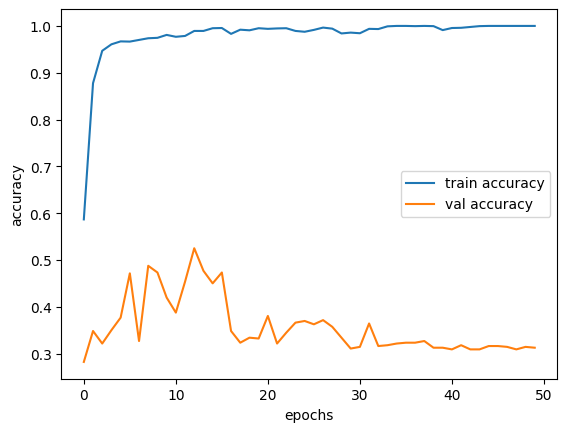

In [36]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

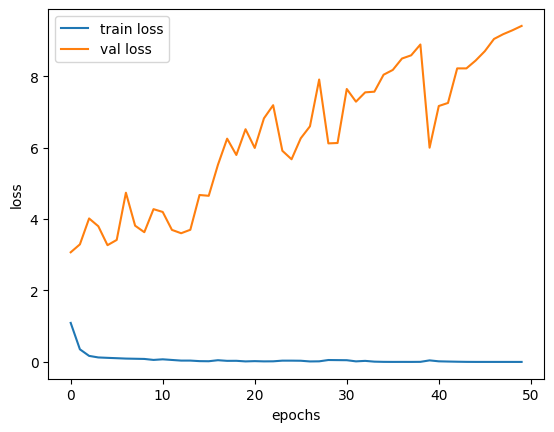

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
import pickle

In [39]:
filename='speech.pkl'

In [40]:
pickle.dump(df,open(filename,'wb'))

In [41]:
model=pd.read_pickle("/content/speech.pkl")

In [42]:
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,ps
1,/content/TESS Toronto emotional speech set dat...,ps
2,/content/TESS Toronto emotional speech set dat...,ps
3,/content/TESS Toronto emotional speech set dat...,ps
4,/content/TESS Toronto emotional speech set dat...,ps
